Install and start mysql.

In [1]:
!apt-get -y install mysql-server
!service mysql start
!pip install mysql-connector-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl
  libhttp-date-perl libhttp-message-perl libio-html-perl
  liblwp-mediatypes-perl libmecab2 liburi-perl mecab-ipadic mecab-ipadic-utf8
  mecab-utils mysql-client-8.0 mysql-client-core-8.0 mysql-server-8.0
  mysql-server-core-8.0
Suggested packages:
  libdata-dump-perl libipc-sharedcache-perl libwww-perl mailx tinyca
The following NEW packages will be installed:
  libcgi-fast-perl libcgi-pm-perl libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhtml-template-perl
  libhttp-date-perl libhttp-message-perl libio-html-perl
  liblwp-mediatypes-perl libmecab2 liburi-perl mecab-ipadic mecab-ipadic-utf8
  mecab-utils mysql-client-8.0 mysql-client-core-8.0 mysql-server
  mysql-server-8.0 m

In [2]:
!mysql -uroot -e "FLUSH PRIVILEGES; ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY ''; FLUSH PRIVILEGES;"

!mysql -uroot -e "create database if not exists testing;"
!mysql -uroot -e "drop table if exists testing.bigness;"
!mysql -uroot -e "create table testing.bigness (id INT PRIMARY KEY AUTO_INCREMENT, value VARCHAR(255));"

In [3]:
import mysql.connector
import os
file_path = '/content/profiles.dat'

!rm /content/profiles.dat

con = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="testing"
)

def fetchAll(sql):
  cursor = con.cursor()
  cursor.execute(sql)
  return cursor.fetchall()

def write(dat):
  with open(file_path, 'a') as f:
      f.write(dat + os.linesep)

import tempfile
import os

# Create a temporary directory
with tempfile.TemporaryDirectory() as temp_dir:
    print(f'Temporary directory: {temp_dir}')


write(f'"time","label"')

rm: cannot remove '/content/profiles.dat': No such file or directory
Temporary directory: /tmp/tmpg64dhm7k


Create a database & schema for the test.

Insert data into the table.

In [4]:
!mysql -uroot testing -e "insert into bigness (value) VALUES ('First Value'), ('Second Value'), ('Third Value'), ('Fourth Value');"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"
!mysql -uroot testing -e "insert into bigness (value) SELECT value FROM bigness;"


Get total count of items.

In [10]:
!mysql -uroot testing -e "SELECT CONCAT(FORMAT(total/1000, 0), ',', LPAD(total%1000, 3, '0')) as total FROM (select count(1) total from bigness) as sub;"

+---------+
| total   |
+---------+
| 131,072 |
+---------+


In [6]:
con.reconnect()
fetchAll("set PROFILING=1;")
rows = fetchAll("select SQL_CALC_FOUND_ROWS * FROM bigness WHERE id > 10 AND value like '%First%' limit 1;")

total = fetchAll("select FOUND_ROWS()")

profiling = fetchAll("SHOW PROFILES;")

elapsed = 0.0
for val in profiling:
  elapsed += val[1]

elapseString = str(elapsed)
write(f'"{elapsed}","FOUND_ROWS"')



In [7]:
con.reconnect()
fetchAll("set PROFILING=1;")
rows = fetchAll("select * FROM bigness WHERE id > 10 limit 1;")

total = fetchAll("select count(*) total from bigness where id > 10")

profiling = fetchAll("SHOW PROFILES;")
elapsed = 0.0
for val in profiling:
  elapsed += val[1]

elapseString = str(elapsed)
write(f'"{elapsed}","COUNT(*)"')



In [8]:
con.close()

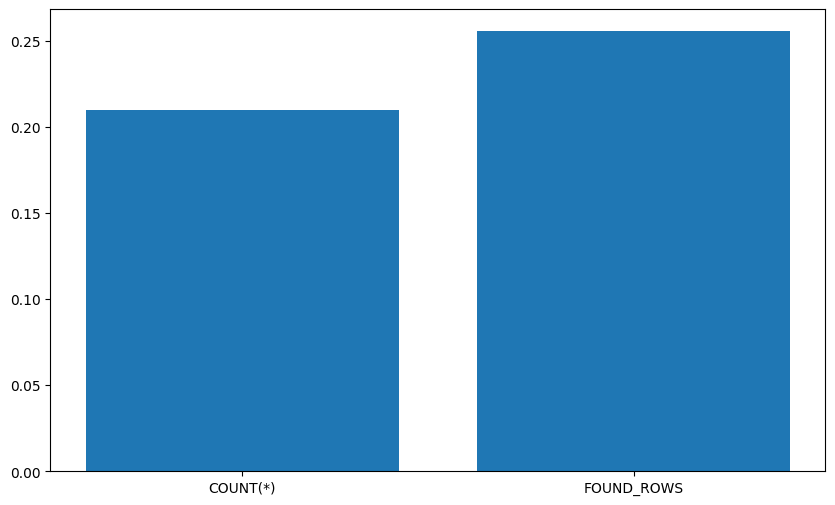

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

# Read data from CSV file
data = pd.read_csv(file_path, sep=',', quotechar='"')

# Create lists to store graph data and labels
graphData = []
labels = []

# Open the CSV file and read data into the lists
with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        graphData.append(float(row['time']))  # assuming 'time' is a column in your CSV
        labels.append(row['label'])  # assuming 'label' is a column in your CSV

labels, graphData = zip(*sorted(zip(labels, graphData)))

# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(labels, graphData)
ymin, ymax = plt.ylim()
plt.ylim([0, ymax])
plt.show()
